# Assignment - High Frequency Words

## Team Members

*Simon Ustoyev

*Elina Azrilyan

*Jack Russo

*Anil Akyildirim

## Introduction

In this assignment, we are asked to pick a corpus of our choice and answer/perform below tasks.


1. Choose a corpus of interest. 

2. How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way). 

3. Taking the most common words, how many unique words represent half of the total words in the corpus? 

4. Identify the 200 highest frequency words in this corpus. 

5. Create a graph that shows the relative frequency of these 200 words. 

6. Does the observed relative frequency of these words follow Zipf’s law?  Explain. 

7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.” 

[Assignment Video](https://screencast-o-matic.com/watch/cY1ZDI5csN)

### 1. Choose a corpus of interest

nltk package has variety of different corpuses tthat we can use which are listed here: https://www.nltk.org/book/ch02.html 

In [1]:
# Load Packages
import nltk
import pandas as pd
from nltk.corpus import webtext
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

We decided to use one of the Web and Chat Text Corpuses which is considered as less formal language text. Let's look at what is available.

In [2]:
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


We decided to use wine.txt corpus. We will further load the corpus and start answering the questions. 

### 2. How many total unique words are in the corpus?  (Please feel free to define unique words in any interesting, defensible way). 

In [3]:
# create the wine object
wine = webtext.words('wine.txt')

In [4]:
# Look at the length
len(wine)

31350

We define the words as plain English.

In [5]:
# Stopwords
# multiple references can be found, example: https://www.tutorialspoint.com/python_text_processing/python_remove_stopwords.htm#:~:text=Stopwords%20are%20the%20English%20words,this%20in%20corpus%20named%20corpus.
stopwords_english = stopwords.words('english')

In [6]:
# Remove puncatuation/ and any characters that are not letters
# multiple references can be found, example: https://stackoverflow.com/questions/46486157/how-to-remove-every-word-with-non-alphabetic-characters
words = [word for word in wine if word.isalpha()]

In [7]:
#unique words
unique_words = list((words)) 
unique_words[0:5]

['Lovely', 'delicate', 'fragrant', 'Rhone', 'wine']

In [8]:
len(unique_words)

24326

We have 24,326 unique words. However, this list includes words that has one letter such as "a" or "I" and etc... or words that are three letters such as "are". 

In [9]:
#calculate length of each word
df_words = pd.DataFrame(unique_words)
df_words.columns = ['Word']
df_words['Word_length'] = df_words['Word'].apply(lambda x: len(x))
df_words.head()

,Word,Word_length
0,Lovely,6
1,delicate,8
2,fragrant,8
3,Rhone,5
4,wine,4


In [10]:
df_words_less_than_three = (df_words[df_words['Word_length']<3].sort_values(by='Word_length'))
df_words_less_than_three.head()

,Word,Word_length
10,a,1
18589,I,1
8389,A,1
8379,A,1
8374,a,1


In [11]:
df_words = df_words[df_words.Word_length > 3]
df_words.head()

,Word,Word_length
0,Lovely,6
1,delicate,8
2,fragrant,8
3,Rhone,5
4,wine,4


In [12]:
unique_words=list(df_words['Word'])

In [13]:
len(unique_words)

15764

After removing words that has less than 3 characters, we see that the total unique words in the corpus is 15,764. 

### 3.Taking the most common words, how many unique words represent half of the total words in the corpus?

We are assuming we will use the unique words list we created, not including the words that has less than 3 characters. So we are looking at the most common words within the unique words.

In [14]:
# most common words
# multiple references can be found, example: https://www.strehle.de/tim/weblog/archives/2015/09/03/1569
wine_freq_dist = nltk.FreqDist(unique_words)
wine_freq_dist #nltk.probability.FreqDist

FreqDist({'fruit': 296, 'with': 260, 'good': 250, 'wine': 229, 'this': 227, 'Very': 211, 'quite': 204, 'very': 169, 'that': 152, 'nose': 151, ...})

In [15]:
len(unique_words)/2

7882.0

Half of the unique words is 7,882 words.

In [16]:
#create words table with all the unique words
df_all_words = pd.DataFrame(unique_words)
df_all_words.columns = ['Word']
df_all_words.head()

,Word
0,Lovely
1,delicate
2,fragrant
3,Rhone
4,wine


In [17]:
# add freqeuncy of each word to the table
df_all_words_freq = pd.DataFrame(df_all_words['Word'].value_counts()).reset_index(drop=False)
df_all_words_freq.columns = ['Word', 'Frequency']
df_all_words_freq.head()

,Word,Frequency
0,fruit,296
1,with,260
2,good,250
3,wine,229
4,this,227


In [18]:
# add total frequency - cumilative frequency column to the table-
df_all_words_freq['Total_Frequency'] = df_all_words_freq['Frequency'].cumsum()
df_all_words_freq.head()

,Word,Frequency,Total_Frequency
0,fruit,296,296
1,with,260,556
2,good,250,806
3,wine,229,1035
4,this,227,1262


In [19]:
# find the amount of most common unique words that has the count of half of unique words
len(df_all_words_freq[df_all_words_freq['Total_Frequency'] <= 7882])

140

140 unique words represents the half of the total unique words in the corpus.

### 4.Identify the 200 highest frequency words in this corpus.

Again, we are going to look at the both unique words with less than 3 letters with highest frequency and also all the words with highest frequency. 

In [20]:
# highest frequency unique words
# multiple references can be found, example: https://stackoverflow.com/questions/35086440/python-how-to-compute-the-top-x-most-frequently-used-words-in-an-nltk-corpus
highest_frequency_unique = wine_freq_dist.most_common(200)
highest_frequency_unique[0:5]

[('fruit', 296), ('with', 260), ('good', 250), ('wine', 229), ('this', 227)]

The top 200 highest frequency unique words that has less than 3 letters start with fruit, with, good, wine and this. 

In [21]:
# highest frequency all words
all_wine_freq_dist = nltk.FreqDist(words)
highest_frequency_all = all_wine_freq_dist.most_common(200)
highest_frequency_all[0:5]

[('a', 821), ('and', 787), ('the', 706), ('of', 482), ('but', 474)]

As expected when we look at the highest frequency of all words, a, and, the , of and but are on top of the list.

### 5. Create a graph that shows the relative frequency of these 200 words.

Again, we are going to look at the unique words that are more than 3 characters. 

In [22]:
# create a dataframe from the most common unique words.
df = pd.DataFrame(wine_freq_dist.most_common(200))
df.columns = ['Word', 'Frequency']
df.head()

,Word,Frequency
0,fruit,296
1,with,260
2,good,250
3,wine,229
4,this,227


Relative frequency is the frequency relative to the total of the words frequency.

In [23]:
# Calculate relative frequency and add as a column
df['Relative_frequency'] = df['Frequency']/df['Frequency'].sum()
df = df.reset_index(drop=False)
df.head()

,index,Word,Frequency,Relative_frequency
0,0,fruit,296,0.033326
1,1,with,260,0.029273
2,2,good,250,0.028147
3,3,wine,229,0.025782
4,4,this,227,0.025557


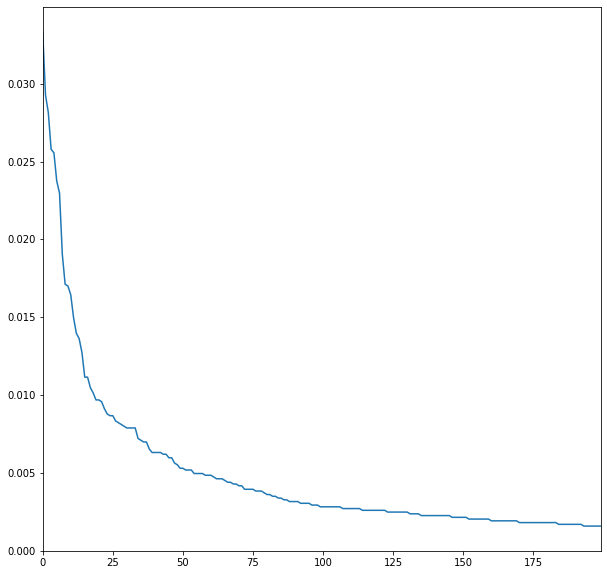

In [24]:
#plot the relative frequency 
plt.figure(3,figsize=(10,10))
df['Relative_frequency'].plot()

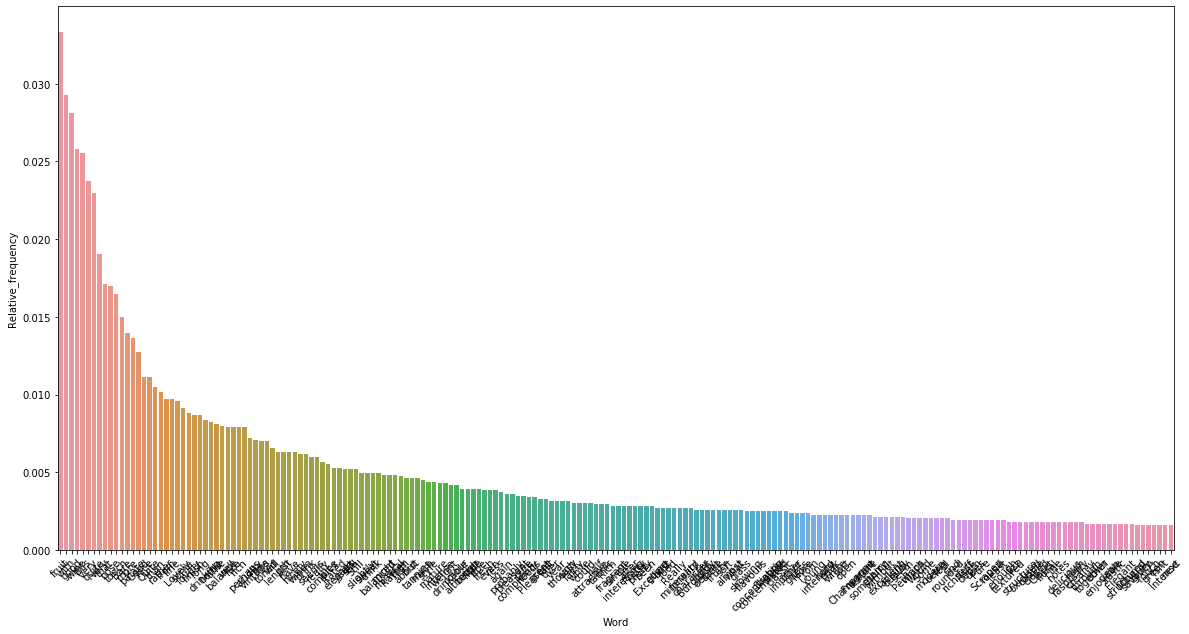

In [35]:
# plot the relative frequency as a bar chart for each word
plt.figure(3,figsize=(20,10))
sns.barplot(df.Word, df.Relative_frequency)
plt.xticks(rotation=45)
plt.show()

### 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Let's say the frequency of a word (fruit) is f(fruit). And we suppose that all the words of a text are ranked according to their frequency, with the most frequent word first. Zipf's law suggests that the frequency of a word type is proportional to its rank. For example 50th most common word type should occur three times as frequently as the 150th most common word.

So rth most common word would be P(r)=0.1/r

In [ ]:
df['Zip_Probability'] = 0.1/(df['index'] + 1)

In [ ]:
plt.figure(3,figsize=(20,10))
plt.plot(df['Relative_frequency'], 'blue')
plt.plot(df['Zip_Probability'], 'red')
plt.show()

From the above plot, we can see that the text is following Zipf law by looking at red , relative frequency and blue zip probability line.

### 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

Again, we are only looking at the unique words that has more than 3 letters. We will take an example of another corpus and see the frequent word of that corpus to find out the difference of the frequency of the words in this corpus from all words in all corpora. For example we can look at the Brown Corpus in the corpora. Reference: Book Natural Language Processing with Python page 76. 

In [ ]:
from nltk.corpus import brown
brown.categories()

In [ ]:
# We select the news 
brown = brown.words(categories='news') 

In [ ]:
stopwords_english = stopwords.words('english')
words = [word for word in brown if word.isalpha()]
unique_words = list((words)) 
df_words = pd.DataFrame(unique_words)
df_words.columns = ['Word']
df_words['Word_length'] = df_words['Word'].apply(lambda x: len(x))
df_words_less_than_three = (df_words[df_words['Word_length']<3].sort_values(by='Word_length'))
df_words = df_words[df_words.Word_length > 3]
unique_words=list(df_words['Word'])
brown_freq_dist = nltk.FreqDist(unique_words)
highest_frequency_unique = brown_freq_dist.most_common(200)
highest_frequency_unique[0:5]

When we look at the "wine" corpus, we see that the top frequntly used words are "fruit", "with", "good" and "wine, however when we look at the other corpus Brown we see that the frequently used words are different in terms of its style. It gives the impression that it is more formal. 